In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

In [60]:
data = pd.read_csv('history_export.txt', sep="|", header = None,encoding='utf-16', nrows=100, error_bad_lines=False)
data.columns = ["Time", "URL"]

C:\Users\Aakarsh\AppData\Local\Temp\ipykernel_16472\72628943.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('history_export.txt', sep="|", header = None,encoding='utf-16', nrows=100, error_bad_lines=False)


In [61]:
data['Time'] = pd.to_datetime(data['Time'])
data

,Time,URL
0,2023-08-12 17:55:46,https://nwm.iitk.ac.in/?_task=mail&_mbox=INBOX
1,2023-08-12 17:54:22,file:///C:/Users/pc/Downloads/311d467bf903b3ad...
2,2023-08-12 17:52:55,https://codeforces.com/contest/1859/problem/D
3,2023-08-12 17:52:50,https://codeforces.com/contest/1859
4,2023-08-12 17:52:01,https://placement.iitk.ac.in/student/rc/5/cale...
...,...,...
95,2023-08-12 15:47:48,https://www.youtube.com/feed/history
96,2023-08-12 15:47:18,https://www.google.com/search?q=maximum+value+...
97,2023-08-12 15:44:18,https://www.google.com/search?q=how+to+improve...
98,2023-08-12 15:44:14,https://www.google.com/search?q=how+to+improve...


In [62]:
data.index = data['Time']
del data['Time']
domainList = [0]*len(data)
data

,URL
Time,
2023-08-12 17:55:46,https://nwm.iitk.ac.in/?_task=mail&_mbox=INBOX
2023-08-12 17:54:22,file:///C:/Users/pc/Downloads/311d467bf903b3ad...
2023-08-12 17:52:55,https://codeforces.com/contest/1859/problem/D
2023-08-12 17:52:50,https://codeforces.com/contest/1859
2023-08-12 17:52:01,https://placement.iitk.ac.in/student/rc/5/cale...
...,...
2023-08-12 15:47:48,https://www.youtube.com/feed/history
2023-08-12 15:47:18,https://www.google.com/search?q=maximum+value+...
2023-08-12 15:44:18,https://www.google.com/search?q=how+to+improve...


In [63]:
headers = requests.utils.default_headers()
headers.update(
    {
        'User-Agent': 'Custom User Agent 1.0',
        'From': 'aakarsh21@iitk.ac.in'  # Stick in your IITK email id
    }
)

In [64]:
for idx in range(len(data)):
    print(idx)
    url = data.URL[idx]
    if(len(url)>5):
        try:
            r = requests.get(url, headers=headers)
        except:
            r = ''
            pass
        if(type(r)!=str):
            soup = BeautifulSoup(r.text, 'lxml')
            if(len(soup('title'))>0):
                if(soup('title')[0].string is not None):
                    domainList[idx] = soup('title')[0].string.encode('utf-8').strip()     
                else:
                    domainList[idx] = "Null"
            else:
                domainList[idx] = "Null"
        else:
            domainList[idx] = "Null"

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [65]:
data

,URL
Time,
2023-08-12 17:55:46,https://nwm.iitk.ac.in/?_task=mail&_mbox=INBOX
2023-08-12 17:54:22,file:///C:/Users/pc/Downloads/311d467bf903b3ad...
2023-08-12 17:52:55,https://codeforces.com/contest/1859/problem/D
2023-08-12 17:52:50,https://codeforces.com/contest/1859
2023-08-12 17:52:01,https://placement.iitk.ac.in/student/rc/5/cale...
...,...
2023-08-12 15:47:48,https://www.youtube.com/feed/history
2023-08-12 15:47:18,https://www.google.com/search?q=maximum+value+...
2023-08-12 15:44:18,https://www.google.com/search?q=how+to+improve...


In [66]:
data['Domain']= domainList
data

,URL,Domain
Time,,
2023-08-12 17:55:46,https://nwm.iitk.ac.in/?_task=mail&_mbox=INBOX,b'IIT Kanpur Webmail :: Welcome to IIT Kanpur ...
2023-08-12 17:54:22,file:///C:/Users/pc/Downloads/311d467bf903b3ad...,Null
2023-08-12 17:52:55,https://codeforces.com/contest/1859/problem/D,b'Problem - D - Codeforces'
2023-08-12 17:52:50,https://codeforces.com/contest/1859,b'Dashboard - Codeforces Round 892 (Div. 2) - ...
2023-08-12 17:52:01,https://placement.iitk.ac.in/student/rc/5/cale...,b'RC - Events - Calendar'
...,...,...
2023-08-12 15:47:48,https://www.youtube.com/feed/history,Null
2023-08-12 15:47:18,https://www.google.com/search?q=maximum+value+...,"b'maximum value of pi*i-max(pi,i) in a permuta..."
2023-08-12 15:44:18,https://www.google.com/search?q=how+to+improve...,b'how to improve n! solution in c++ - Google S...


In [67]:
data.to_csv('chrome_history.csv')

In [68]:
docs = data.Domain.unique()
docs

array([b'IIT Kanpur Webmail :: Welcome to IIT Kanpur Webmail', 'Null',
       b'Problem - D - Codeforces',
       b'Dashboard - Codeforces Round 892 (Div. 2) - Codeforces',
       b'RC - Events - Calendar', b'RC - Attendance', b'RC - Proformas',
       b'RC - Applications', b'RC - Openings', b'RC - Manage Resume',
       b'RC - Notices', b'RC - Event - Details', b'Events - undefined',
       b'Stats Studentwise',
       b'The *RANDOM* YouTuber Skin Challenge! - YouTube', b'YouTube',
       b'Convertio \xe2\x80\x94 File Converter',
       b'CSV to TXT (Online & Free) \xe2\x80\x94 Convertio',
       b'csv to text - Google Search',
       b'Student Login -ALLEN Batch Progress Monitoring System',
       b'iphone - sqlite prepare statement error - no such table - Stack Overflow',
       b'Error: in prepare, no such table: \xe2\x94\xac\xc3\xa1urls - Google Search',
       b'ind vs wi - Google Search',
       b'extract chrome history using sqllite - Google Search',
       b'Return CSV of Chro

In [69]:
data

,URL,Domain
Time,,
2023-08-12 17:55:46,https://nwm.iitk.ac.in/?_task=mail&_mbox=INBOX,b'IIT Kanpur Webmail :: Welcome to IIT Kanpur ...
2023-08-12 17:54:22,file:///C:/Users/pc/Downloads/311d467bf903b3ad...,Null
2023-08-12 17:52:55,https://codeforces.com/contest/1859/problem/D,b'Problem - D - Codeforces'
2023-08-12 17:52:50,https://codeforces.com/contest/1859,b'Dashboard - Codeforces Round 892 (Div. 2) - ...
2023-08-12 17:52:01,https://placement.iitk.ac.in/student/rc/5/cale...,b'RC - Events - Calendar'
...,...,...
2023-08-12 15:47:48,https://www.youtube.com/feed/history,Null
2023-08-12 15:47:18,https://www.google.com/search?q=maximum+value+...,"b'maximum value of pi*i-max(pi,i) in a permuta..."
2023-08-12 15:44:18,https://www.google.com/search?q=how+to+improve...,b'how to improve n! solution in c++ - Google S...


In [70]:
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim

In [71]:
tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = get_stop_words('en')

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()


In [72]:
doc_set = docs.tolist()
doc_set

[b'IIT Kanpur Webmail :: Welcome to IIT Kanpur Webmail',
 'Null',
 b'Problem - D - Codeforces',
 b'Dashboard - Codeforces Round 892 (Div. 2) - Codeforces',
 b'RC - Events - Calendar',
 b'RC - Attendance',
 b'RC - Proformas',
 b'RC - Applications',
 b'RC - Openings',
 b'RC - Manage Resume',
 b'RC - Notices',
 b'RC - Event - Details',
 b'Events - undefined',
 b'Stats Studentwise',
 b'The *RANDOM* YouTuber Skin Challenge! - YouTube',
 b'YouTube',
 b'Convertio \xe2\x80\x94 File Converter',
 b'CSV to TXT (Online & Free) \xe2\x80\x94 Convertio',
 b'csv to text - Google Search',
 b'Student Login -ALLEN Batch Progress Monitoring System',
 b'iphone - sqlite prepare statement error - no such table - Stack Overflow',
 b'Error: in prepare, no such table: \xe2\x94\xac\xc3\xa1urls - Google Search',
 b'ind vs wi - Google Search',
 b'extract chrome history using sqllite - Google Search',
 b'Return CSV of Chrome Browsing History with sqlite - Stack Overflow',
 b'How to analyze your Google Chrome histor

In [73]:
texts = []

# loop through document list
for i in doc_set:
    try:
        # Decode bytes object if it is a bytes object
        if isinstance(i, bytes):
            i = i.decode('utf-8')
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    except AttributeError:
        texts.append([])
        pass
    except UnicodeDecodeError:
        texts.append([])
        pass
texts


[['iit', 'kanpur', 'webmail', 'welcom', 'iit', 'kanpur', 'webmail'],
 ['null'],
 ['problem', 'd', 'codeforc'],
 ['dashboard', 'codeforc', 'round', '892', 'div', '2', 'codeforc'],
 ['rc', 'event', 'calendar'],
 ['rc', 'attend'],
 ['rc', 'proforma'],
 ['rc', 'applic'],
 ['rc', 'open'],
 ['rc', 'manag', 'resum'],
 ['rc', 'notic'],
 ['rc', 'event', 'detail'],
 ['event', 'undefin'],
 ['stat', 'studentwis'],
 ['random', 'youtub', 'skin', 'challeng', 'youtub'],
 ['youtub'],
 ['convertio', 'file', 'convert'],
 ['csv', 'txt', 'onlin', 'free', 'convertio'],
 ['csv', 'text', 'googl', 'search'],
 ['student', 'login', 'allen', 'batch', 'progress', 'monitor', 'system'],
 ['iphon',
  'sqlite',
  'prepar',
  'statement',
  'error',
  'tabl',
  'stack',
  'overflow'],
 ['error', 'prepar', 'tabl', 'áurl', 'googl', 'search'],
 ['ind', 'vs', 'wi', 'googl', 'search'],
 ['extract', 'chrome', 'histori', 'use', 'sqllite', 'googl', 'search'],
 ['return',
  'csv',
  'chrome',
  'brows',
  'histori',
  'sqlite',

In [74]:
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
corpus

[[(0, 2), (1, 2), (2, 2), (3, 1)],
 [(4, 1)],
 [(5, 1), (6, 1), (7, 1)],
 [(5, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)],
 [(13, 1), (14, 1), (15, 1)],
 [(15, 1), (16, 1)],
 [(15, 1), (17, 1)],
 [(15, 1), (18, 1)],
 [(15, 1), (19, 1)],
 [(15, 1), (20, 1), (21, 1)],
 [(15, 1), (22, 1)],
 [(14, 1), (15, 1), (23, 1)],
 [(14, 1), (24, 1)],
 [(25, 1), (26, 1)],
 [(27, 1), (28, 1), (29, 1), (30, 2)],
 [(30, 1)],
 [(31, 1), (32, 1), (33, 1)],
 [(32, 1), (34, 1), (35, 1), (36, 1), (37, 1)],
 [(34, 1), (38, 1), (39, 1), (40, 1)],
 [(41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1)],
 [(48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1)],
 [(38, 1), (39, 1), (48, 1), (51, 1), (55, 1), (56, 1)],
 [(38, 1), (39, 1), (57, 1), (58, 1), (59, 1)],
 [(38, 1), (39, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1)],
 [(34, 1), (50, 1), (52, 1), (53, 1), (60, 1), (62, 1), (65, 1), (66, 1)],
 [(38, 1), (60, 1), (62, 1), (67, 1), (68, 1), (69, 1)],
 [(70, 1)],
 [(5, 2), (8

In [75]:
# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word = dictionary, passes=20)

In [76]:
ldamodel.print_topics(3)

[(0,
  '0.105*"googl" + 0.093*"search" + 0.051*"histori" + 0.051*"chrome" + 0.029*"c" + 0.027*"youtub" + 0.027*"solut" + 0.014*"folder" + 0.014*"local" + 0.014*"webmail"'),
 (1,
  '0.037*"home" + 0.037*"permut" + 0.026*"pi" + 0.016*"c" + 0.015*"convertio" + 0.015*"stack" + 0.015*"sqlite" + 0.015*"overflow" + 0.015*"use" + 0.015*"csv"'),
 (2,
  '0.088*"codeforc" + 0.055*"rc" + 0.029*"error" + 0.029*"892" + 0.029*"round" + 0.022*"div" + 0.022*"2" + 0.022*"event" + 0.015*"databas" + 0.015*"compil"')]

In [77]:
ldamodel.get_topic_terms(0,10)

[(38, 0.104993306),
 (39, 0.09278933),
 (62, 0.05102815),
 (60, 0.05087722),
 (72, 0.029434912),
 (30, 0.026600497),
 (78, 0.026505595),
 (107, 0.014332339),
 (108, 0.0143323215),
 (2, 0.014331674)]

In [78]:
top_terms = ldamodel.get_topic_terms(0, 10)
top_words = [dictionary[id] for id, score in top_terms]
print(top_words)


['googl', 'search', 'histori', 'chrome', 'c', 'youtub', 'solut', 'folder', 'local', 'webmail']


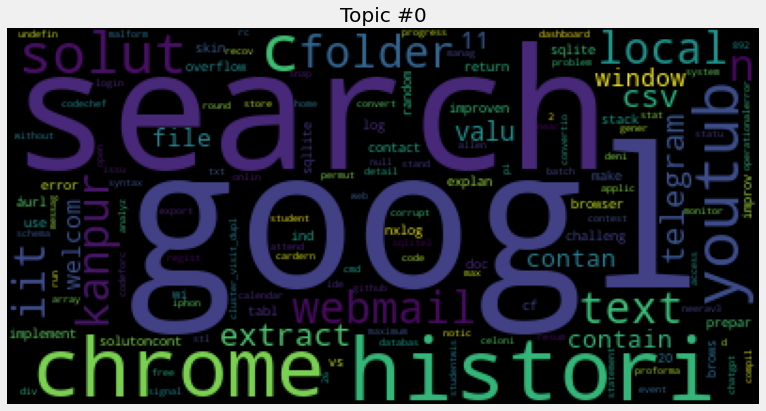

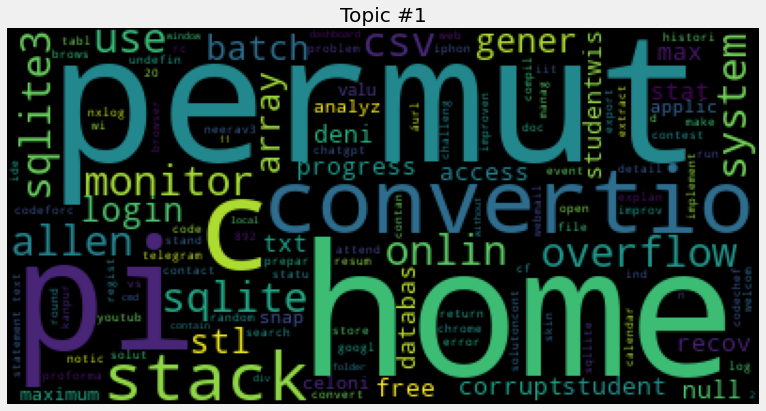

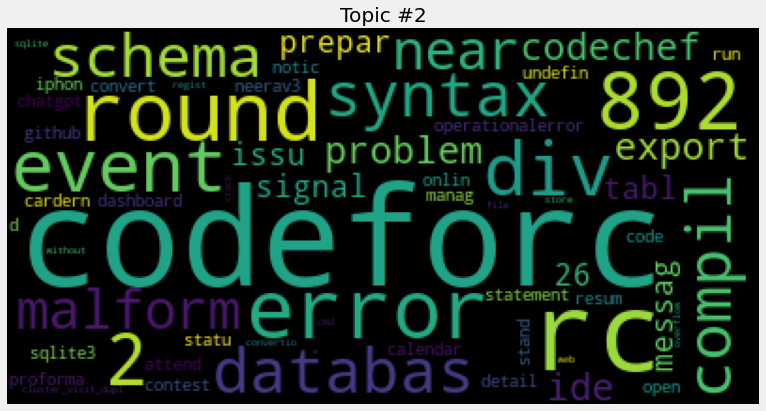

In [79]:
from wordcloud import WordCloud, STOPWORDS
for t in range(ldamodel.num_topics):
    diction={}
    for i in ldamodel.show_topic(t, 200):
        diction[i[0]]=i[1]
    plt.figure(figsize=(12,8))
    plt.imshow(WordCloud().fit_words(diction))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    #plt.savefig('topic #' + str(t) + '.png', bbox_inches='tight')
    plt.show()

In [80]:
topic = [0]*len(data)
for idx in range(len(data)):
    test_idx = doc_set.index(data.Domain[idx])
    probs = ldamodel[dictionary.doc2bow(texts[test_idx])]
    print(probs)
    prs = [item for sublist in probs for item in sublist]
    print(prs)
    topicProbs = []
    for i in probs:
        topicProbs.append(i[1])
    topic[idx] = np.argmax(np.asarray(topicProbs))

[(0, 0.9162115), (1, 0.04195401), (2, 0.04183452)]
[0, 0.9162115, 1, 0.04195401, 2, 0.04183452]
[(0, 0.16737585), (1, 0.6651892), (2, 0.16743493)]
[0, 0.16737585, 1, 0.6651892, 2, 0.16743493]
[(0, 0.08361886), (1, 0.08384956), (2, 0.8325316)]
[0, 0.08361886, 1, 0.08384956, 2, 0.8325316]
[(0, 0.041755337), (1, 0.041818015), (2, 0.9164266)]
[0, 0.041755337, 1, 0.041818015, 2, 0.9164266]
[(0, 0.083589755), (1, 0.08381198), (2, 0.83259827)]
[0, 0.083589755, 1, 0.08381198, 2, 0.83259827]
[(0, 0.11152495), (1, 0.111889414), (2, 0.77658564)]
[0, 0.11152495, 1, 0.111889414, 2, 0.77658564]
[(0, 0.11152493), (1, 0.111889586), (2, 0.7765855)]
[0, 0.11152493, 1, 0.111889586, 2, 0.7765855]
[(0, 0.11168928), (1, 0.4304002), (2, 0.4579105)]
[0, 0.11168928, 1, 0.4304002, 2, 0.4579105]
[(0, 0.11152496), (1, 0.111889586), (2, 0.7765854)]
[0, 0.11152496, 1, 0.111889586, 2, 0.7765854]
[(0, 0.083716944), (1, 0.084051535), (2, 0.8322315)]
[0, 0.083716944, 1, 0.084051535, 2, 0.8322315]
[(0, 0.11152497), (1, 

In [81]:
data['Topic'] = topic

In [82]:
data.head()

,URL,Domain,Topic
Time,,,
2023-08-12 17:55:46,https://nwm.iitk.ac.in/?_task=mail&_mbox=INBOX,b'IIT Kanpur Webmail :: Welcome to IIT Kanpur ...,0
2023-08-12 17:54:22,file:///C:/Users/pc/Downloads/311d467bf903b3ad...,Null,1
2023-08-12 17:52:55,https://codeforces.com/contest/1859/problem/D,b'Problem - D - Codeforces',2
2023-08-12 17:52:50,https://codeforces.com/contest/1859,b'Dashboard - Codeforces Round 892 (Div. 2) - ...,2
2023-08-12 17:52:01,https://placement.iitk.ac.in/student/rc/5/cale...,b'RC - Events - Calendar',2


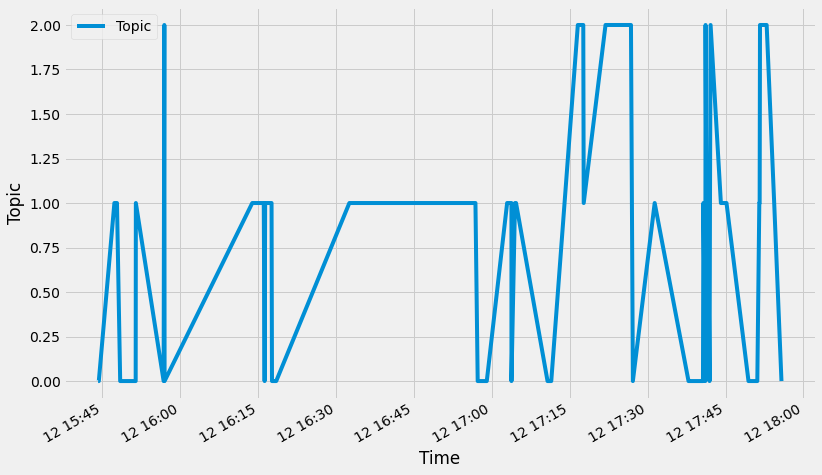

In [83]:
sorted_data = data.sort_index()
plt.style.use('fivethirtyeight')
sorted_data.plot(y='Topic', figsize=(12,8))  # Remove x argument
plt.ylabel('Topic')
plt.xlabel('Time')  # Add x-axis label
plt.show()


In [84]:
cp_data = data
cp_data.index = pd.to_datetime(cp_data.index)  # Convert index to datetime


In [85]:
cp_data.head()

,URL,Domain,Topic
Time,,,
2023-08-12 17:55:46,https://nwm.iitk.ac.in/?_task=mail&_mbox=INBOX,b'IIT Kanpur Webmail :: Welcome to IIT Kanpur ...,0
2023-08-12 17:54:22,file:///C:/Users/pc/Downloads/311d467bf903b3ad...,Null,1
2023-08-12 17:52:55,https://codeforces.com/contest/1859/problem/D,b'Problem - D - Codeforces',2
2023-08-12 17:52:50,https://codeforces.com/contest/1859,b'Dashboard - Codeforces Round 892 (Div. 2) - ...,2
2023-08-12 17:52:01,https://placement.iitk.ac.in/student/rc/5/cale...,b'RC - Events - Calendar',2


In [86]:
occurrences = []
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
for day in weekdays:
    tlist = cp_data[cp_data.index.day_name() == day].Topic.tolist()
    res = np.histogram(tlist,bins=[0,1,2,3])
    print(res)
    occurrences.append(list(res[0]))
    print(occurrences)

(array([0, 0, 0], dtype=int64), array([0, 1, 2, 3]))
[[0, 0, 0]]
(array([0, 0, 0], dtype=int64), array([0, 1, 2, 3]))
[[0, 0, 0], [0, 0, 0]]
(array([0, 0, 0], dtype=int64), array([0, 1, 2, 3]))
[[0, 0, 0], [0, 0, 0], [0, 0, 0]]
(array([0, 0, 0], dtype=int64), array([0, 1, 2, 3]))
[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]
(array([0, 0, 0], dtype=int64), array([0, 1, 2, 3]))
[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]
(array([41, 33, 26], dtype=int64), array([0, 1, 2, 3]))
[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [41, 33, 26]]
(array([0, 0, 0], dtype=int64), array([0, 1, 2, 3]))
[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [41, 33, 26], [0, 0, 0]]


In [87]:
t0 = [0]*len(occurrences)
t1 = [0]*len(occurrences)
t2 = [0]*len(occurrences)

for d in range(len(occurrences)):
    t0[d] = occurrences[d][0]
    t1[d] = occurrences[d][1]
    t2[d] = occurrences[d][2]
print(t0,t1,t2)
cumt1 = [sum(x) for x in zip(t0, t1)]
print(cumt1)


[0, 0, 0, 0, 0, 41, 0] [0, 0, 0, 0, 0, 33, 0] [0, 0, 0, 0, 0, 26, 0]
[0, 0, 0, 0, 0, 74, 0]


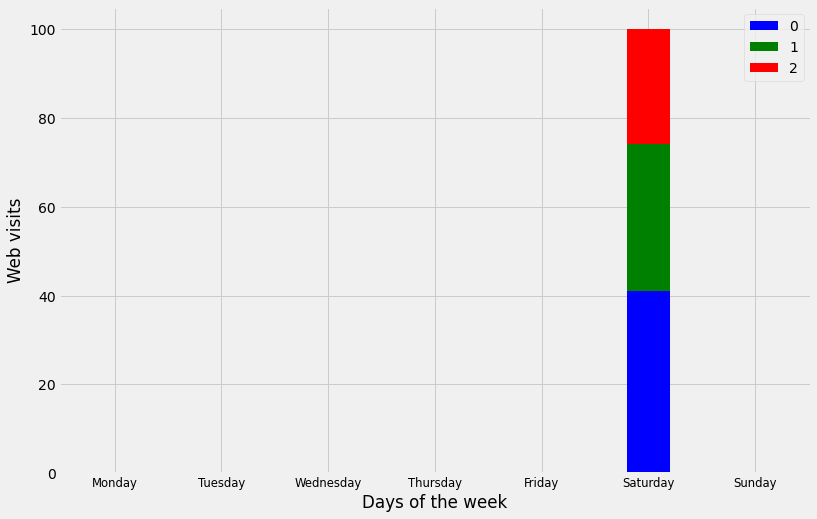

In [89]:
plt.figure(figsize=(12,8))
p0 = plt.bar(range(7), t0, 0.4, label='0', color = 'blue')
p1 = plt.bar(range(7), t1, 0.4,bottom=t0, color='green', label='1')
p2 = plt.bar(range(7), t2, 0.4, bottom=cumt1, color='red', label='2')
plt.xticks(range(7), weekdays, size='small')
plt.xlabel('Days of the week')
plt.ylabel('Web visits')
plt.legend()
plt.show()

In [88]:
cp_data = cp_data.drop(['URL','Domain'],axis=1)
new_index=[]
for i in cp_data.index:
    new_index.append(str(i).split(" ")[1])
new_index2=[]
for i in new_index:
    new_index2.append(str(i).split(":")[0])
new_index2

['17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '15',
 '15',
 '15',
 '15',
 '15',
 '15',
 '15',
 '15',
 '15',
 '15',
 '15']

In [90]:
# Add the list as a new column named 'X'
cp_data.index= new_index2
cp_data['X'] = new_index2
cp_data

,Topic,X
17,0,17
17,1,17
17,2,17
17,2,17
17,2,17
...,...,...
15,1,15
15,1,15
15,0,15
15,0,15


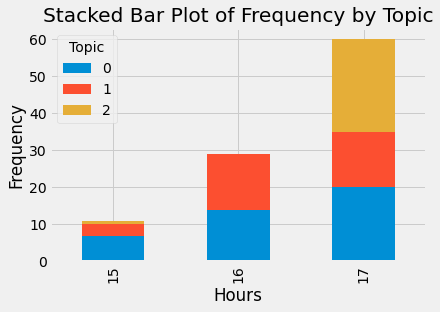

In [91]:
pivot_data = cp_data.pivot_table(index='X', columns='Topic', aggfunc='size', fill_value=0)
pivot_data.plot(kind='bar', stacked=True)
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Stacked Bar Plot of Frequency by Topic')
plt.legend(title='Topic')
plt.show()
